Priya Gandhi


> E19CSE291



In [1]:
from google.colab import drive
drive.mount("/content/gdrive",)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
import sys
os.chdir('/content/gdrive/My Drive/license plates')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/My Drive/license plates
/content/gdrive/My Drive/license plates


In [3]:
import cv2
import argparse
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

In [4]:
def plt_imshow(title, image):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

##Read images

In [5]:
args = {
	"image1": "14.JPG",
  "image2": "IMG_0466.jpg"
}

In [6]:
def readgray_image(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt_imshow("Gray Scale", gray)
  return gray

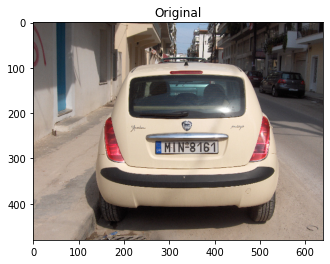

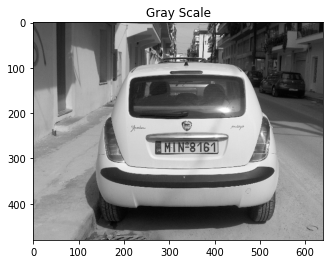

In [7]:
image1 = args["image1"]
img = cv2.imread(image1)
plt_imshow("Original", img)
gray = readgray_image(img)

In [8]:
gray.shape

(480, 640)

##Apply filter and find edges for localization

In [9]:
def blurring(gray):
  blur_img = cv2.GaussianBlur(gray, (5,5), 0)
  plt_imshow('Blurred', blur_img)
  return blur_img

In [10]:
def auto_canny(img, sigma=0.33):
  v = np.mean(img)
  tlower = int(max(0, (1.0-sigma)*v))
  tupper = int(min(255, (1.0+sigma)*v))
  edge_img = cv2.Canny(img, tlower, tupper)
  return edge_img

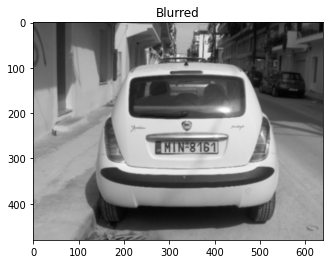

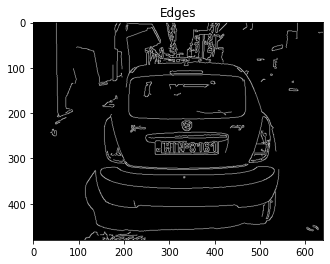

In [11]:
blurred = blurring(gray)
edged = auto_canny(blurred)
plt_imshow("Edges", edged)

##Find Contours and Apply Mask

In [12]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)

In [13]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 20, True)
  if len(approx) == 4:
    location = approx
    break

In [14]:
location

array([[[248, 253]],

       [[270, 291]],

       [[405, 291]],

       [[431, 250]]], dtype=int32)

In [15]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)

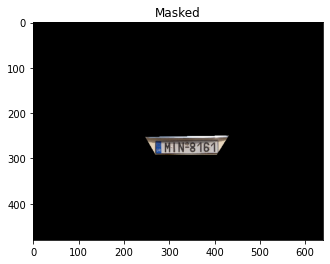

In [16]:
plt_imshow("Masked", new_image)

In [17]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray[x1:x2+1, y1:y2+1]

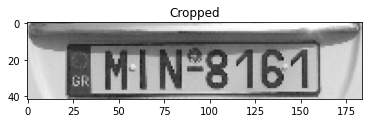

In [18]:
plt_imshow("Cropped", cropped_img)

##Render Result

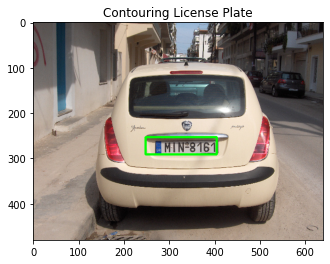

In [19]:
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt_imshow("Contouring License Plate", res)

##for 2nd image

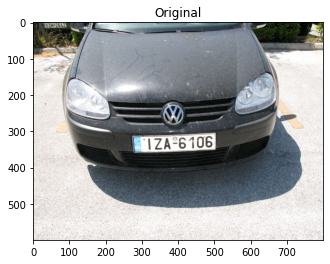

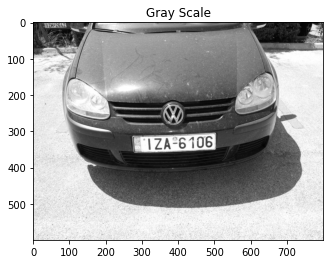

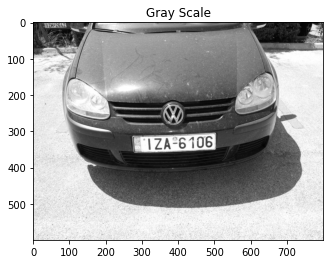

In [20]:
img2 = cv2.imread(args["image2"])
plt_imshow("Original", img2)
gray2 = readgray_image(img2)
plt_imshow("Gray Scale", gray2)

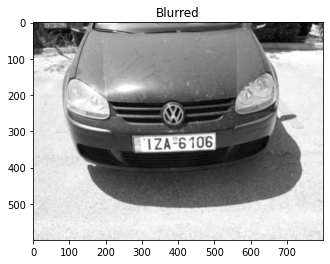

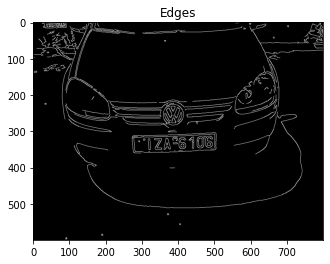

In [21]:
blurred2 = blurring(gray2)
edged2 = auto_canny(blurred2)
plt_imshow("Edges", edged2)

In [22]:
keypoints = cv2.findContours(edged2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [23]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 20, True)
  if len(approx) == 4:
    location = approx
    break

In [24]:
location

array([[[505, 307]],

       [[279, 317]],

       [[280, 352]],

       [[500, 352]]], dtype=int32)

In [25]:
mask = np.zeros(gray2.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img2, img2, mask = mask)

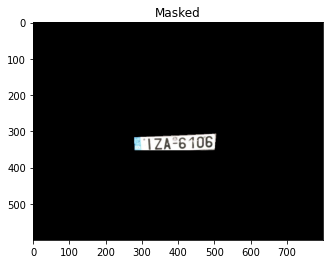

In [26]:
plt_imshow("Masked", new_image)

In [27]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray2[x1:x2+1, y1:y2+1]

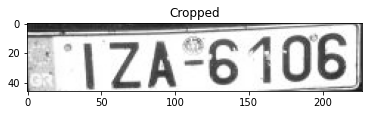

In [28]:
plt_imshow("Cropped", cropped_img)

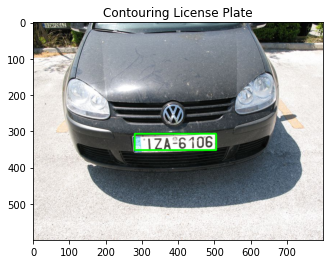

In [29]:
res = cv2.rectangle(img2, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt_imshow("Contouring License Plate", res)